## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras
from keras.layers import BatchNormalization
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
EPOCHS = 20 
BATCHSIZE = 512
LEARNING_RATE = 1e-3
MOMENTUM =0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

model_ckp1 = ModelCheckpoint(filepath='./tem2.h5',
                            monitor= 'val_loss',
                           save_best_only= True)

model_ckp2 = ModelCheckpoint(filepath='./tem3.h5',
                            monitor= 'val_loss',
                           save_best_only= False)

model1 = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,nesterov= True, momentum = MOMENTUM)
model1.compile(loss='categorical_crossentropy',
             metrics= ['accuracy'],
             optimizer = optimizer)



model2 = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,nesterov= True, momentum = MOMENTUM)
model2.compile(loss='categorical_crossentropy',
             metrics= ['accuracy'],
             optimizer = optimizer)



In [11]:
model1.fit(x_train,y_train,
         epochs = EPOCHS,
         batch_size = BATCHSIZE,
         validation_data=(x_test,y_test),
         shuffle = True,
         callbacks = [model_ckp1])
train_loss1 = model1.history.history["loss"]
valid_loss1 = model1.history.history["val_loss"]
train_acc1 = model1.history.history["accuracy"]
valid_acc1 = model1.history.history["val_accuracy"]

model2.fit(x_train,y_train,
         epochs = EPOCHS,
         batch_size = BATCHSIZE,
         validation_data=(x_test,y_test),
         shuffle = True,
         callbacks = [model_ckp2])
train_loss2 = model2.history.history["loss"]
valid_loss2 = model2.history.history["val_loss"]
train_acc2 = model2.history.history["accuracy"]
valid_acc2 = model2.history.history["val_accuracy"]

Epoch 1/20
98/98 [==============================] - 1s 8ms/step - loss: 1.1873 - accuracy: 0.5896 - val_loss: 1.4747 - val_accuracy: 0.4725
Epoch 2/20
98/98 [==============================] - 1s 6ms/step - loss: 1.1565 - accuracy: 0.5981 - val_loss: 1.4597 - val_accuracy: 0.4831
Epoch 3/20
98/98 [==============================] - 1s 6ms/step - loss: 1.1223 - accuracy: 0.6121 - val_loss: 1.4740 - val_accuracy: 0.4860
Epoch 4/20
98/98 [==============================] - 1s 6ms/step - loss: 1.0931 - accuracy: 0.6224 - val_loss: 1.4610 - val_accuracy: 0.4922
Epoch 5/20
98/98 [==============================] - 1s 6ms/step - loss: 1.0598 - accuracy: 0.6358 - val_loss: 1.4797 - val_accuracy: 0.4823
Epoch 6/20
98/98 [==============================] - 1s 6ms/step - loss: 1.0326 - accuracy: 0.6458 - val_loss: 1.4805 - val_accuracy: 0.4882
Epoch 7/20
98/98 [==============================] - 1s 6ms/step - loss: 1.0008 - accuracy: 0.6581 - val_loss: 1.4877 - val_accuracy: 0.4817
Epoch 8/20
98/98 [==

In [15]:
model1 = keras.models.load_model("./tem2.h5")
loss_loadback1, acc_loadback1 = model1.evaluate(x_test, y_test)

model2 = keras.models.load_model("./tem3.h5")
loss_loadback2, acc_loadback2 = model2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 1.8433 - accuracy: 0.4878


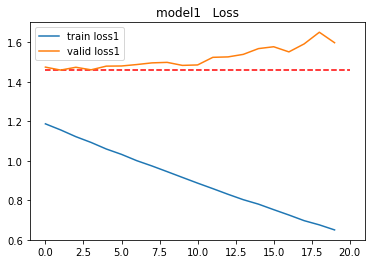

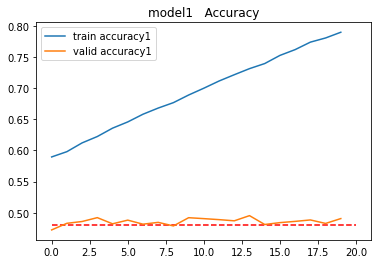

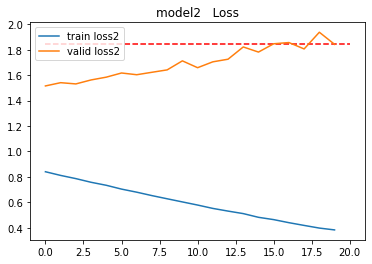

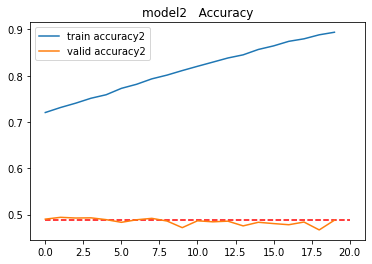

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss1)), train_loss1, label="train loss1")
plt.plot(range(len(valid_loss1)), valid_loss1, label="valid loss1")
plt.hlines(y=loss_loadback1, xmin=0, xmax=len(train_loss1), colors='r', linestyles='--')
plt.legend()
plt.title("model1   Loss")
plt.show()

plt.plot(range(len(train_acc1)), train_acc1, label="train accuracy1")
plt.plot(range(len(valid_acc1)), valid_acc1, label="valid accuracy1")
plt.hlines(y=acc_loadback1, xmin=0, xmax=len(train_acc1), colors='r', linestyles='--')
plt.legend()
plt.title("model1   Accuracy")
plt.show()


plt.plot(range(len(train_loss2)), train_loss2, label="train loss2")
plt.plot(range(len(valid_loss2)), valid_loss2, label="valid loss2")
plt.hlines(y=loss_loadback2, xmin=0, xmax=len(train_loss2), colors='r', linestyles='--')
plt.legend()
plt.title("model2   Loss")
plt.show()

plt.plot(range(len(train_acc2)), train_acc2, label="train accuracy2")
plt.plot(range(len(valid_acc2)), valid_acc2, label="valid accuracy2")
plt.hlines(y=acc_loadback2, xmin=0, xmax=len(train_acc2), colors='r', linestyles='--')
plt.legend()
plt.title("model2   Accuracy")
plt.show()